In [12]:
import json
import glob

def load_sqlog(filename):
    lines = []
    with open(filename, "r") as f:
        for line in f:
            lines.append(json.loads(line.strip()))
    return lines

In [85]:
def extract_cwnd_cr_state(sqlog):
    cwnd_points = []
    cr_points = []
    for event in sqlog:
        if "name" in event.keys() and "recovery:metrics" in event["name"]:
            if 'congestion_window' in event["data"]:
                time = event["time"]
                cwnd = event["data"]["congestion_window"]
                cwnd_points.append([time, cwnd])
            if 'cr_state' in event["data"]:
                time = event["time"]
                cr = event["data"]["cr_state"]
                cr_points.append([time, cr])
    return cwnd_points, cr_points

def extract_offsets(sqlog):
    packets_sent = []
    packets_received = {}
    length = 0
    for event in sqlog:
        if "name" in event.keys() and "transport:packet_sent" in event["name"]:
            if 'header' in event["data"]:
                time = event["time"]
                pn = event["data"]["header"]["packet_number"]
                length += event["data"]["raw"]["length"]
                packets_sent.append([time, pn, length])
        if "name" in event.keys() and "transport:packet_received" in event["name"]:
            if 'header' in event["data"]:
                try:
                    time = event["time"]
                    ranges = event["data"]["frames"][0]["acked_ranges"]
                    packets_received[time] = ranges
                except Exception as e:
                    pass#print(e)
    return packets_sent, packets_received

['reno-cr-not-trigger.sqlog', 'cubic-cr-not-trigger.sqlog', 'picoquic-default-FC-geo-50mbdown-5mbup-20mbfile-with-resume2.sqlog', 'picoquic-default-FC-geo-50mbdown-5mbup-20mbfile-with-resume.sqlog', 'cubic-cr-triggers.sqlog', 'reno-cr-triggers.sqlog', 'picoquic-default-FC-geo-50mbdown-5mbup-20mbfile-with-resume3.sqlog', 'picoquic-default-FC-geo-50mbdown-5mbup-20mbfile.sqlog', 'picoquic-default-FC-geo-50mbdown-5mbup.sqlog']
{47.79971: [[0, 0]], 48.01168: [[0, 1]], 107.428276: [[0, 2]], 107.69765: [[0, 6]], 107.94242: [[0, 10]], 108.95868: [[0, 12]], 150.41379: [[0, 20]], 151.59991: [[0, 26]], 151.89258: [[0, 33]], 192.83177: [[0, 41]], 193.15479: [[0, 43]], 194.14157: [[0, 45]], 194.38544: [[0, 49]], 194.6369: [[0, 53]], 194.86415: [[0, 62]], 236.53554: [[0, 70]], 236.78867: [[0, 72]], 238.5511: [[0, 80]], 238.90591: [[0, 90]], 239.97783: [[0, 101]], 278.67606: [[0, 109]], 279.66647: [[0, 121]], 280.70044: [[0, 123]], 284.23114: [[0, 129]], 284.53464: [[0, 131]], 284.79498: [[0, 137]], 

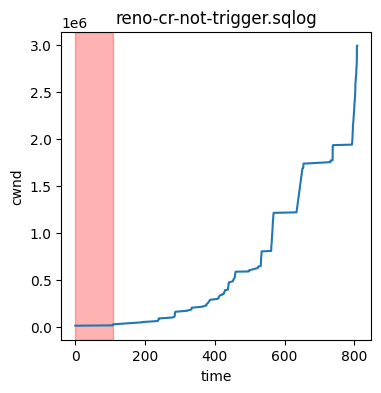

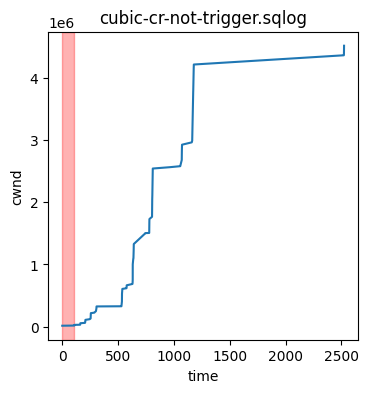

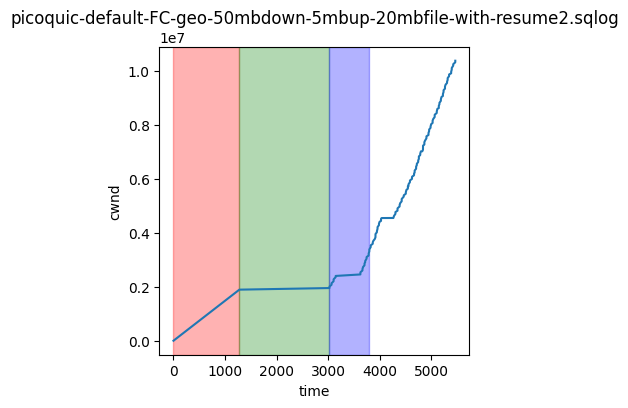

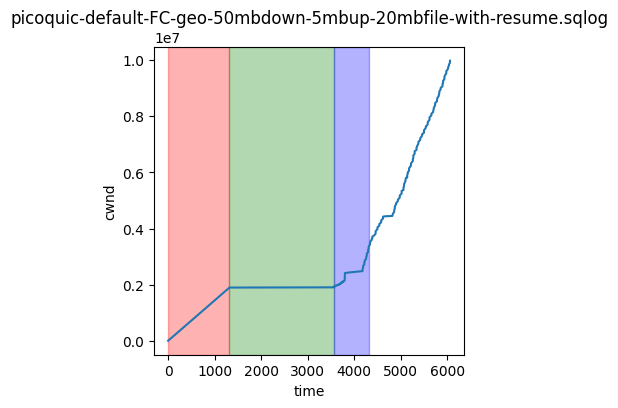

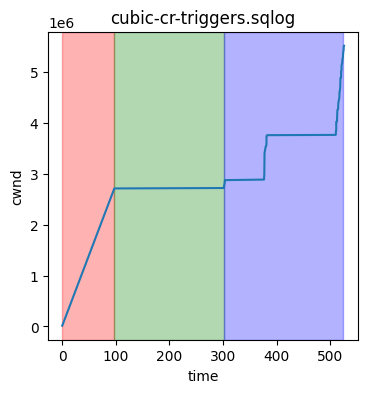

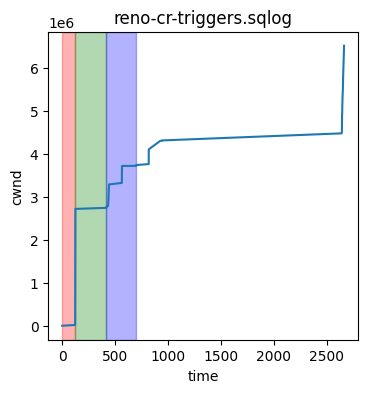

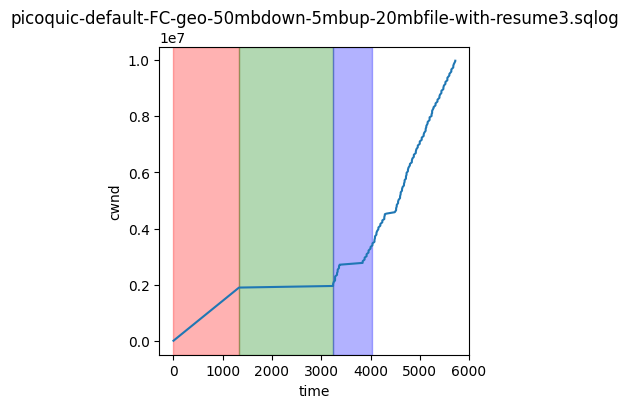

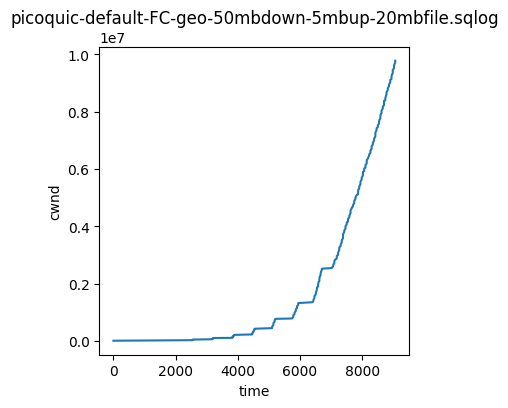

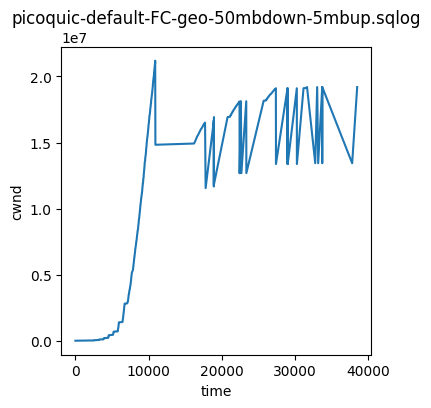

In [86]:
all_logs = glob.glob("*.sqlog")
print(all_logs)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for log in all_logs:
    fig = plt.figure(figsize=(4, 4))
    sqlog = load_sqlog(log)
    colors = ['r', 'g', 'b']
    pkt_sent, pkt_received = extract_offsets(sqlog)
    print(pkt_received)
    cwnd_points, cr_points = extract_cwnd_cr_state(sqlog)
    print(cr_points)
    for i in range(len(cr_points) - 1):
        x_range = [cr_points[i][0], cr_points[i + 1][0]]
        color = colors[i % len(colors)]  # Cycle through the colors
        plt.axvspan(xmin=x_range[0], xmax=x_range[1], color=color, alpha=0.3)

    df = pd.DataFrame(cwnd_points, columns=["time", "cwnd"])
    sns.lineplot(data=df, x="time", y="cwnd")
    plt.title(log)
    plt.savefig(f"{log}.png")



    
